In [ ]:
# Importamos las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

##### Tenemos en cuenta las características físicas y hábitos de la persona para que así podamos identificar en los histogramas lo que las personas suelen hacer.

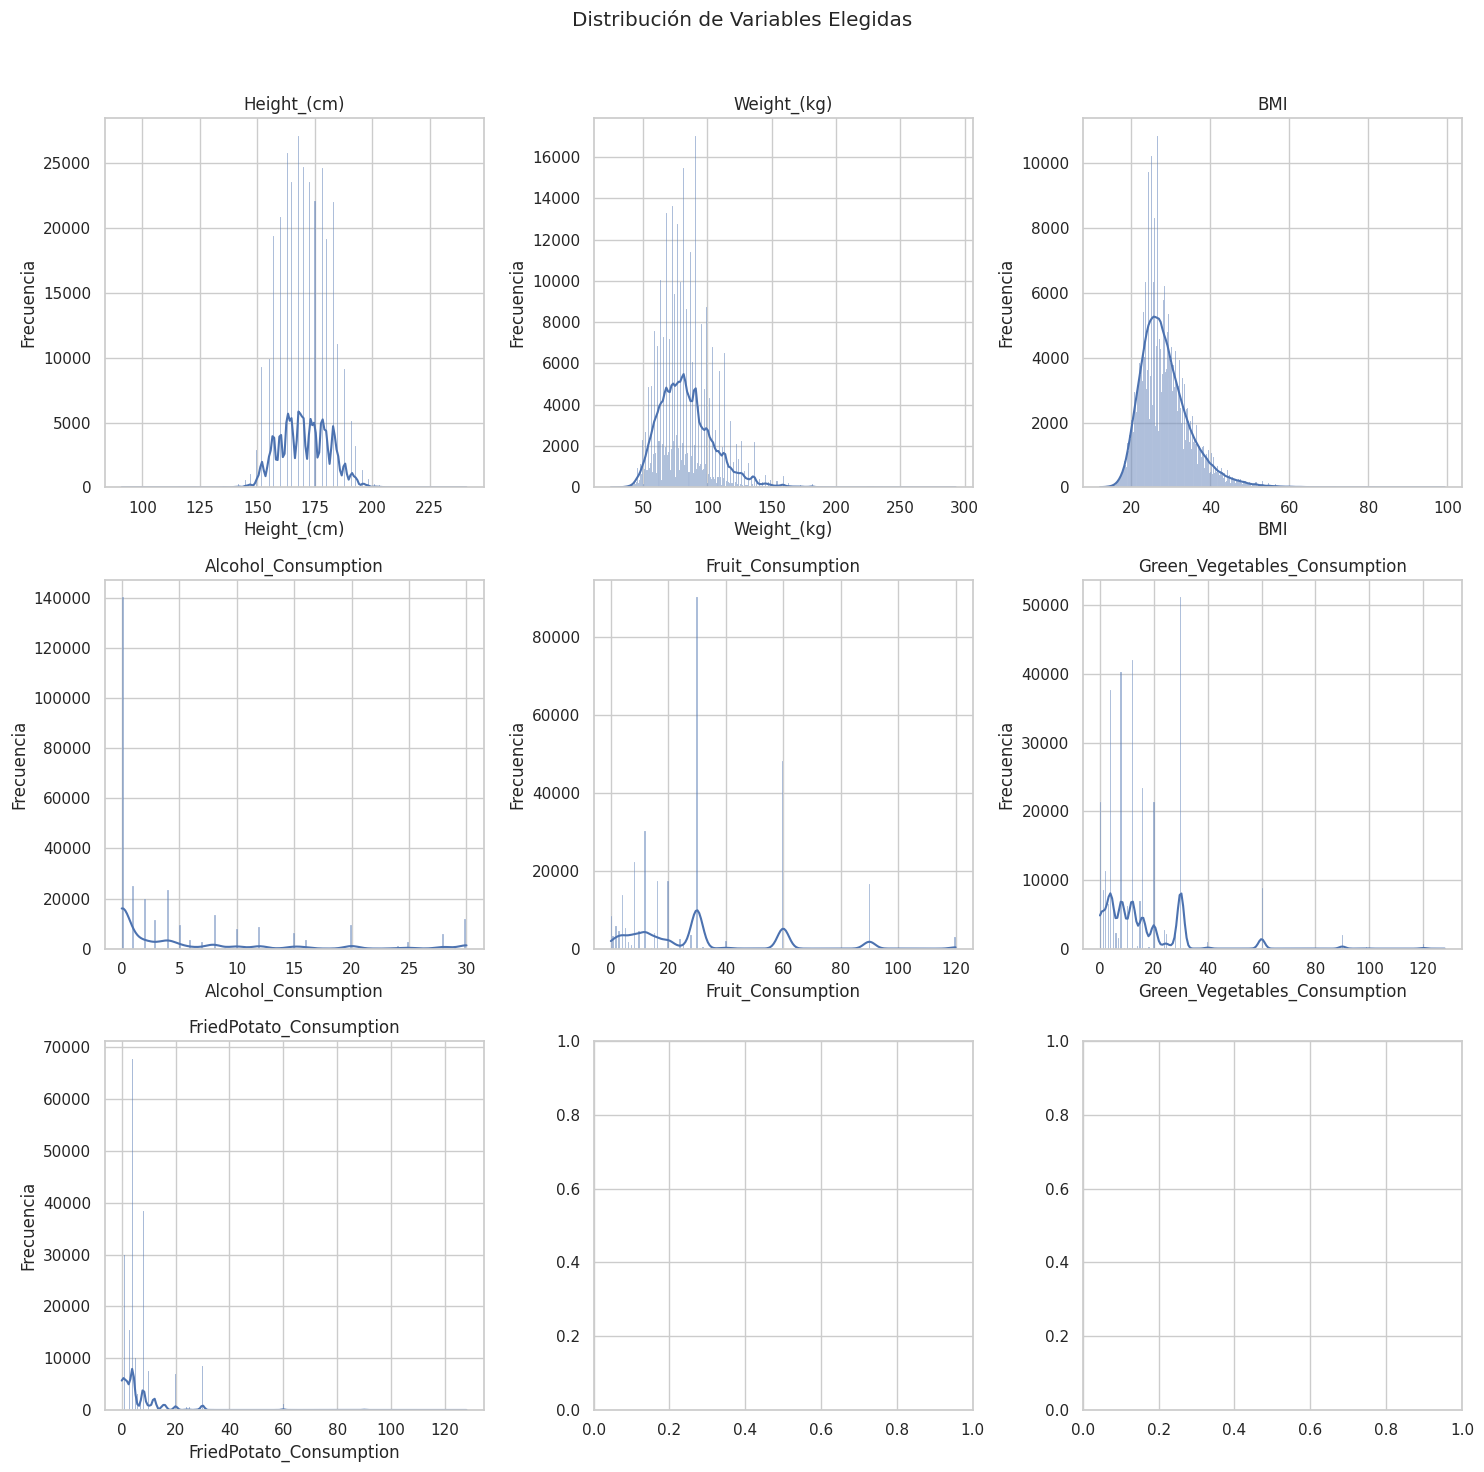

In [ ]:
# Carga de datos
data = pd.read_csv('CVD_cleaned.csv')

# Estilo de los gráficos
sns.set(style="whitegrid")

# Histogramas para variables numéricas elegidas
def plot_histograms(data, variables, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 5*rows))
    fig.suptitle('Distribución de Variables Elegidas')
    for ax, var in zip(axes.flatten(), variables):
        sns.histplot(data[var], kde=True, ax=ax)
        ax.set_title(var)
        ax.set_ylabel('Frecuencia')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Variables numéricas que se eligieron
num_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
            'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Generación de los histogramas
plot_histograms(data, num_vars, 3, 3)

##### Ahora, teniendo en cuenta las variables categóricas, decidimos representar esta información con gráficos de barras y mapa de calor de correlación ya que, representan de la mejor manera la distribución de las frecuencias, y con esto, también se puede hacer una comparación directa entre las variables elegidas.

<ipython-input-100-e16f43f59366>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=data, ax=ax, palette='Set2')
<ipython-input-100-e16f43f59366>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=data, ax=ax, palette='Set2')
<ipython-input-100-e16f43f59366>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=data, ax=ax, palette='Set2')
<ipython-input-100-e16f43f59366>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue

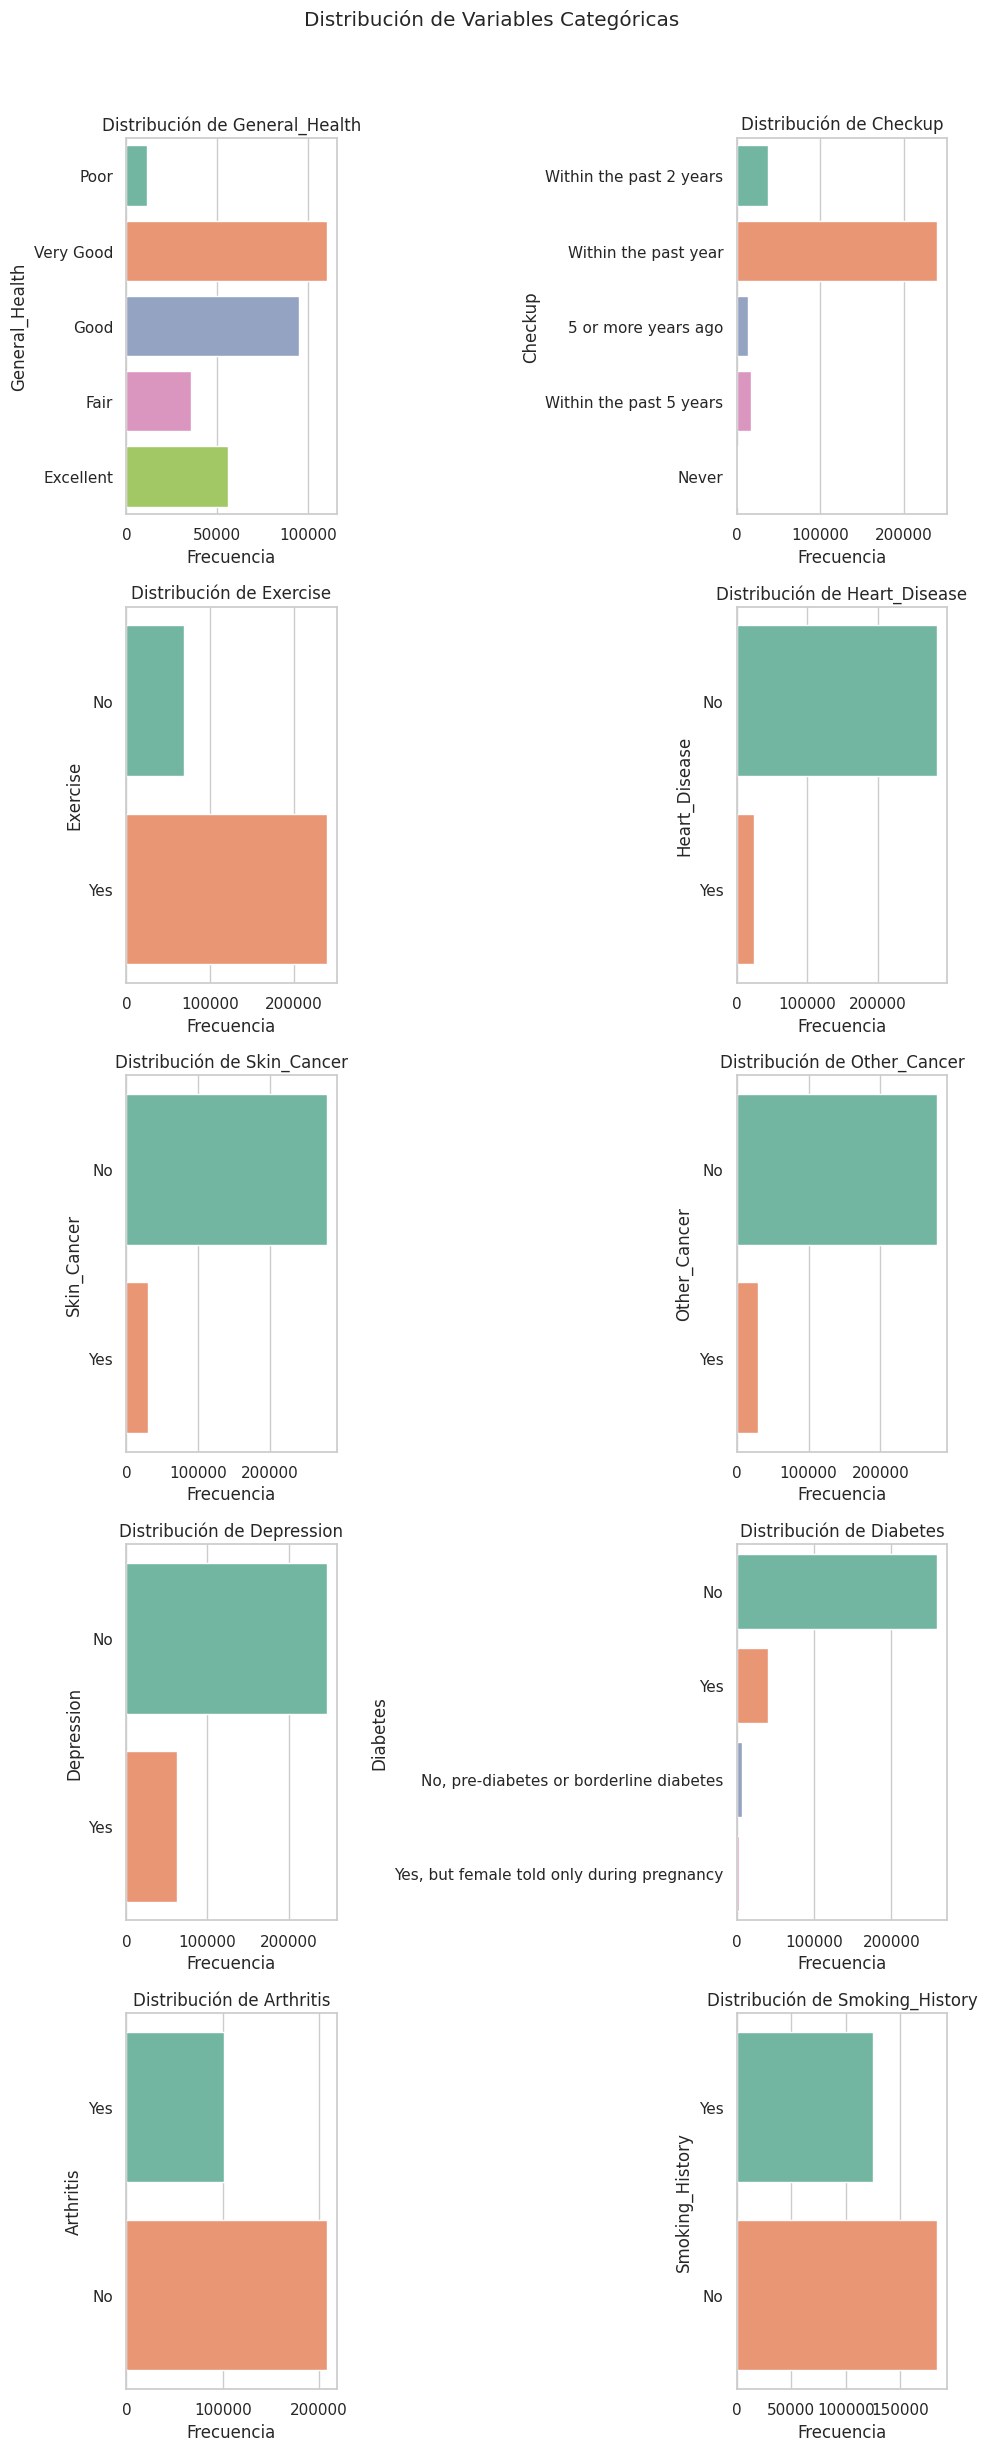

In [ ]:
# Gráficos de barras para variables categóricas elegidas
def plot_bar_charts(data, categorical_vars, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 5*rows))
    fig.suptitle('Distribución de Variables Categóricas')
    for ax, var in zip(axes.flatten(), categorical_vars):
        sns.countplot(y=var, data=data, ax=ax, palette='Set2')
        ax.set_title(f'Distribución de {var}')
        ax.set_xlabel('Frecuencia')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Variables categóricas que se eligieron
cat_vars = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
            'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History']

# Generación de los gráficos de barras
plot_bar_charts(data, cat_vars, 5, 2)


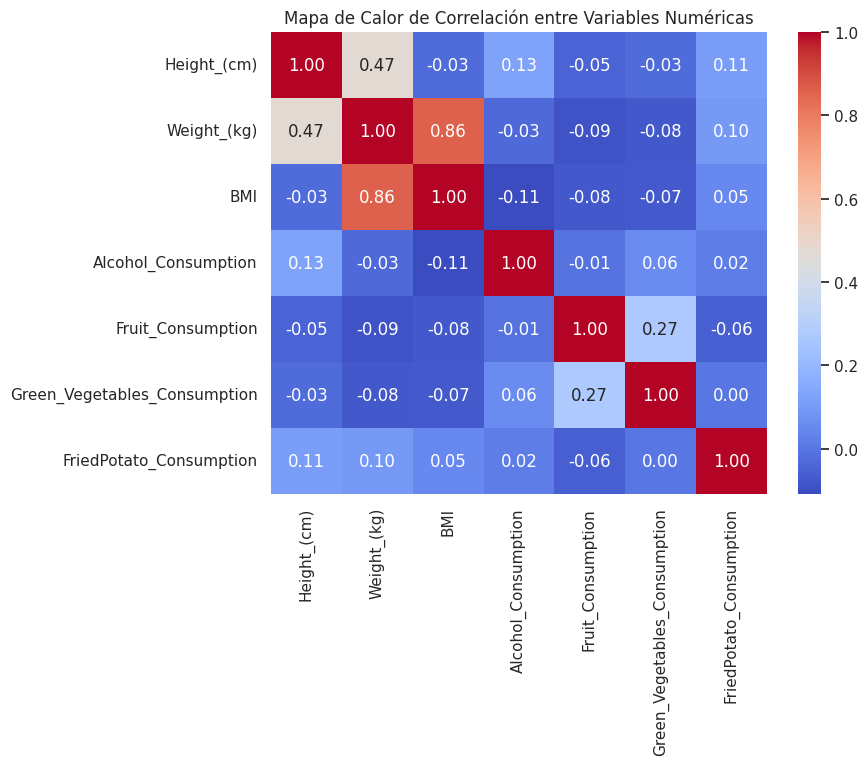

In [ ]:
# Mapa de calor para correlaciones de las variables categóricas que se eligieron
plt.figure(figsize=(8, 6))
sns.heatmap(data[num_vars].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


##### Ahora, para hacer eliminación de variables, elegimos 'Skin_Cancer' y 'FriedPotato_Consumption' ya que, tienen baja variación y poca relevancia en la salud en términos generales, dado que, la población no depende de sus vidas teniendo en cuenta los aspectos anteriores.
##### Skin_Cancer: Se elimina debido a que la mayoría de respuestas es "no", por ende, es una baja variabilidad.
##### FriedPotato_Consumption: Se elimina debido a que tiene una correlación muy baja con la salud en general, y su consumo es muy irrelevante.

In [ ]:
# Eliminación de características elegidas
data_cleaned = data.drop(['Skin_Cancer', 'FriedPotato_Consumption'], axis=1)

# Verificación de las columnas restantes al eliminar las características que se eligieron
print(data_cleaned.columns)


Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption'],
      dtype='object')


##### Teniendo en cuenta la eliminación de datos y limpieza de datos, aplicamos la imputación de las variables numéricas ya que, podemos aplicar media, mediana y moda.

In [ ]:
# Imputación para variables numéricas iniciales que se eligieron
for column in ['Height_(cm)', 'Weight_(kg)', 'BMI']:
    data[column].fillna(data[column].median(), inplace=True)

# Imputación para variables categóricas iniciales que se eligieron
for column in ['General_Health', 'Checkup', 'Exercise']:
    data[column].fillna(data[column].mode()[0], inplace=True)


##### Ahora, eliminamos las columnas que tienen datos faltantes.

In [ ]:
# Eliminamos las filas donde haya valores faltantes
data_cleaned = data.dropna()

##### Con lo anterior, vamos a detectar y eliminar los outliers para evitar la distorción de los modelos utilizando IQR, o Rango Intercuartílico, para realizar la identificación y eliminación de los outliers.

In [ ]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
data_filtered = data[(data['BMI'] >= lower_bound) & (data['BMI'] <= upper_bound)]


##### Después de realizar los filtros de los outliers, vamos a verificar que todos los datos estén en los formatos adecuados, y que sean los que queremos utilizar.

In [ ]:
# Convertir variables categóricas en el dataset a tipo 'category'
for column in ['General_Health', 'Checkup', 'Exercise']:
    data[column] = data[column].astype('category')


##### Realizamos un conteo de las variables para verificar que no tengan ningún dato faltante, al darnos el resultado de 0, significará que aplicamos un filtro "bueno".

In [ ]:
# Calculando el número de valores faltantes por columna en el dataset
missing_values = data.isnull().sum()
print(missing_values)

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [ ]:
data.to_csv('reduced_health_data.csv', index=False)